In [1]:
# Assignment 4 - Data Visualization I

# Problem Statement

# Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information about the passengers 
# who boarded the unfortunate Titanic ship. Use the Seaborn library to see if we can find any patterns in the data.
# Write a code to check how the price of the ticket (column name: 'fare') for each passenger is distributed by 
# plotting a histogram.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

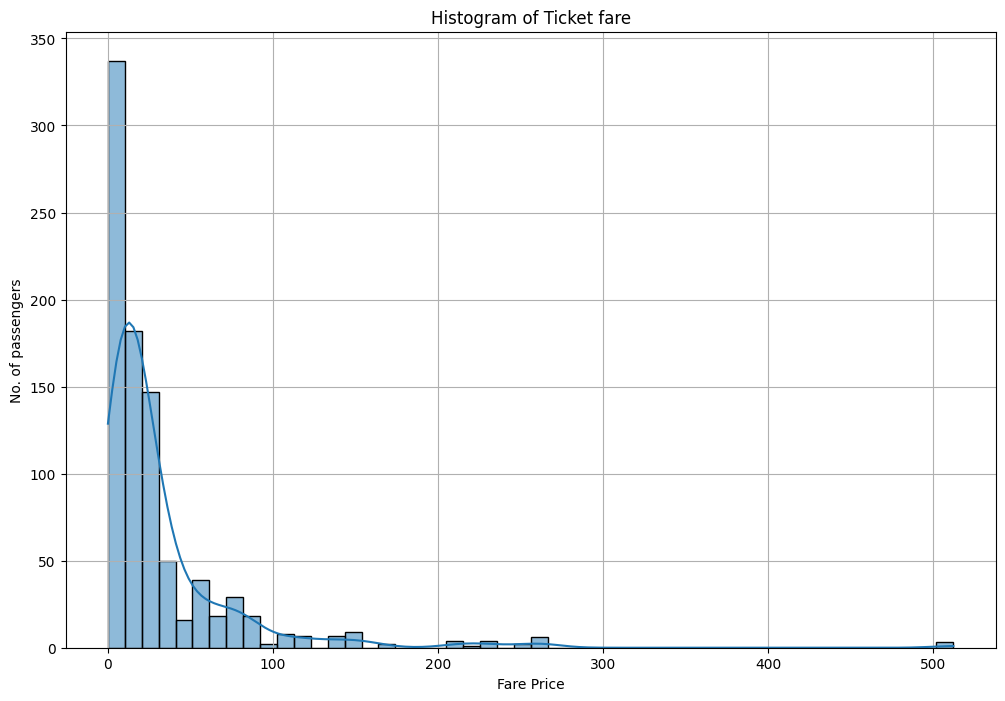

In [16]:
#Distribution of Fare 

plt.figure(figsize=(12,8))
sns.histplot(data['Fare'], kde=True, bins=50)
plt.title("Histogram of Ticket fare")
plt.xlabel("Fare Price")
plt.ylabel("No. of passengers")
plt.grid(True)
plt.show()

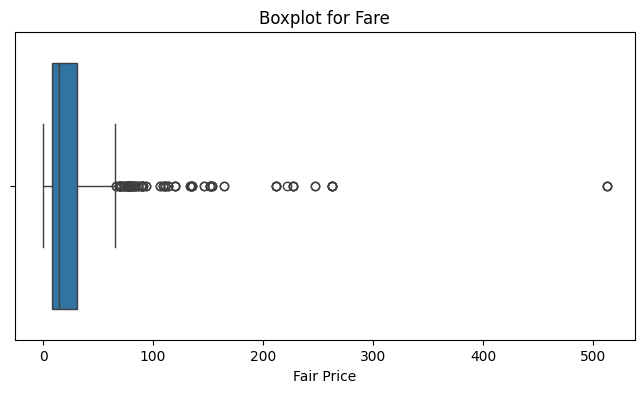

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=data['Fare'])
plt.title("Boxplot for Fare")
plt.xlabel("Fare Price")
plt.show()

In [19]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR 
upper = Q3 + 1.5*IQR

data['Fare_clean'] = np.where(data['Fare'] < lower, lower, np.where(data['Fare'] > upper, upper, data['Fare']))

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,65.6344
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,30.0000


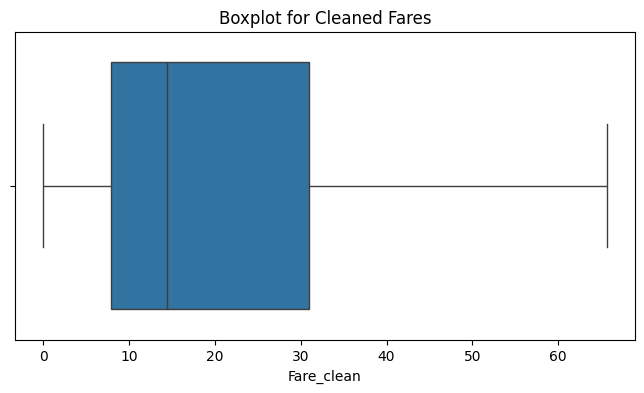

In [20]:
plt.figure(figsize=(8,4))
sns.boxplot(x=data['Fare_clean'])
plt.title("Boxplot for Cleaned Fares")
plt.show()

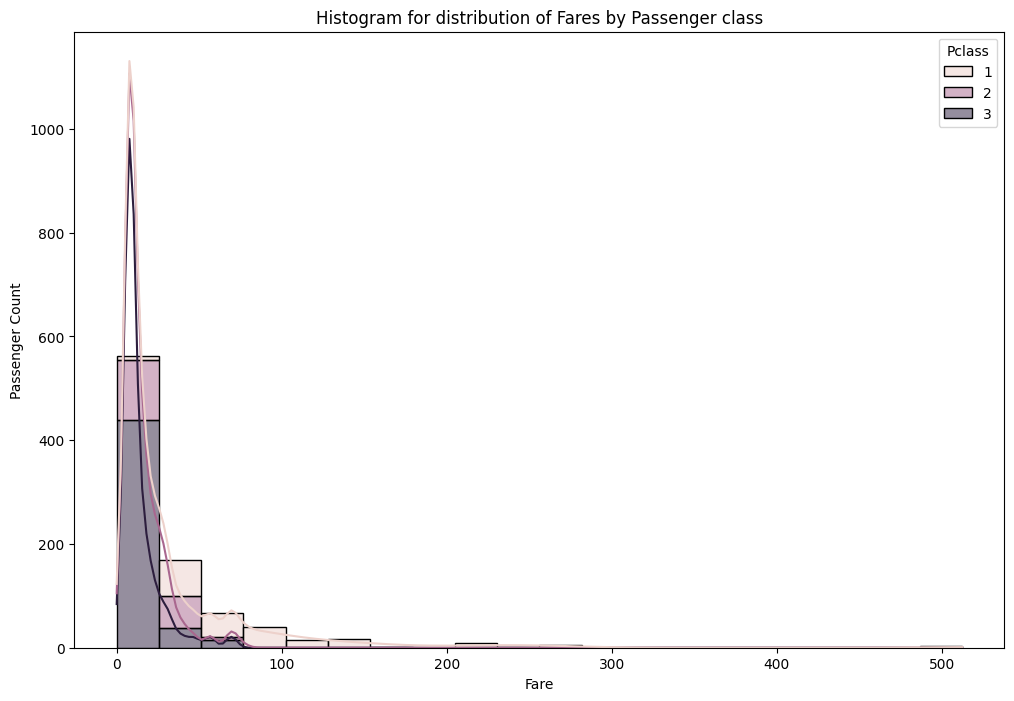

In [27]:
plt.figure(figsize=(12,8))
sns.histplot(data=data, x='Fare', hue='Pclass', kde=True, multiple='stack', bins=20)
plt.title("Histogram for distribution of Fares by Passenger class")
plt.xlabel("Fare")
plt.ylabel("Passenger Count")
plt.show()

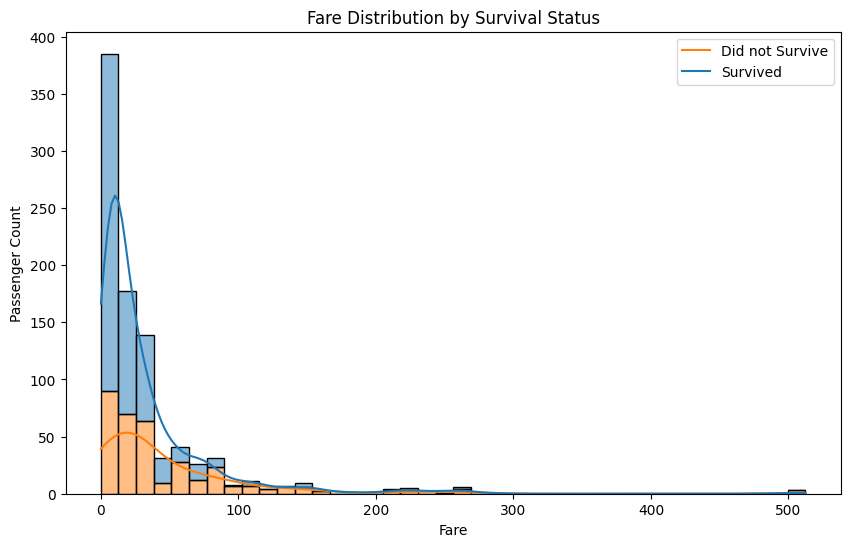

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='Fare', hue='Survived', bins=40, kde=True, multiple='stack')
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Passenger Count')
plt.legend(['Did not Survive', 'Survived'])
plt.show()

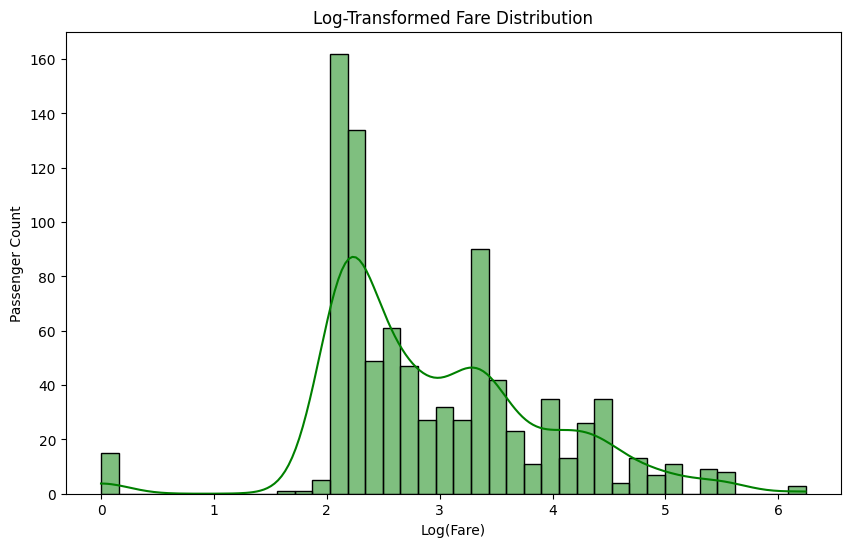

In [ ]:
# Log Transformation to Handle Skewness

data['log_fare'] = np.log1p(data['Fare'])       # log(1 + fare)

plt.figure(figsize=(10,6))
sns.histplot(data['log_fare'], kde=True, bins=40, color='green')
plt.title('Log-Transformed Fare Distribution')
plt.xlabel('Log(Fare)')
plt.ylabel('Passenger Count')
plt.show()

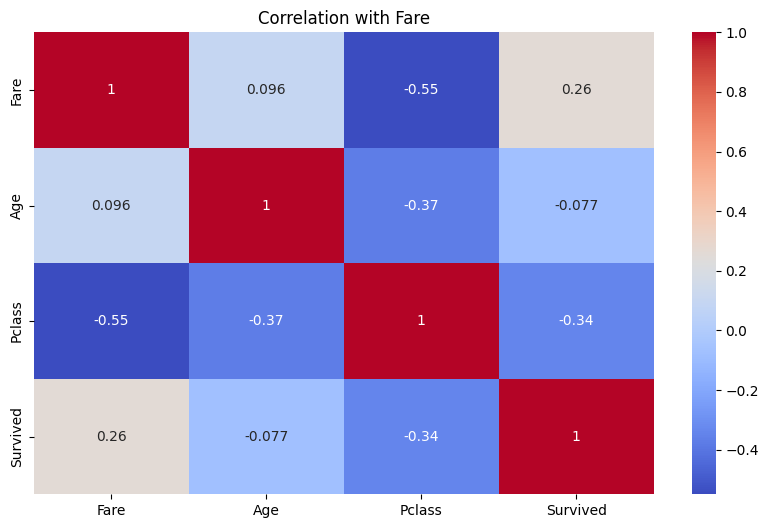

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(data[['Fare', 'Age', 'Pclass', 'Survived']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation with Fare")
plt.show()

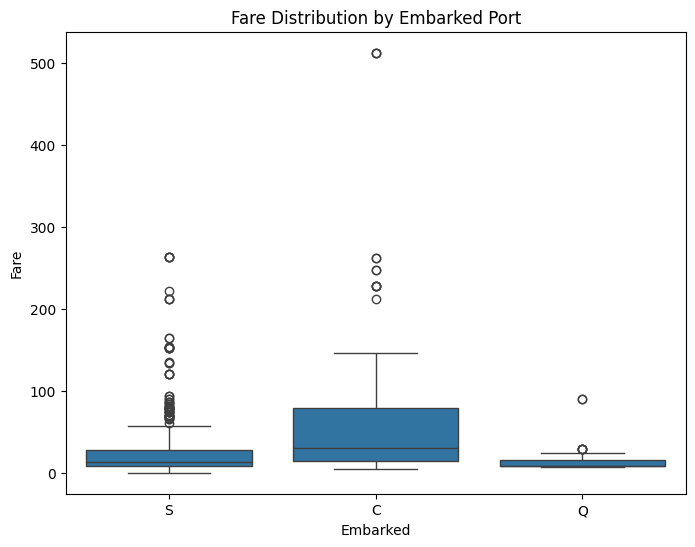

In [42]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Embarked', y='Fare', data=data)
plt.title('Fare Distribution by Embarked Port')
plt.show()